# Random walk

Random motion of particles is a basic principle of Brownian motion and a kind of diffusive process. 
In this class, we will write a code for simulating a model particle with random motion and calculate its mean-squared displacement. 

Text(0, 0.5, 'Frequency')

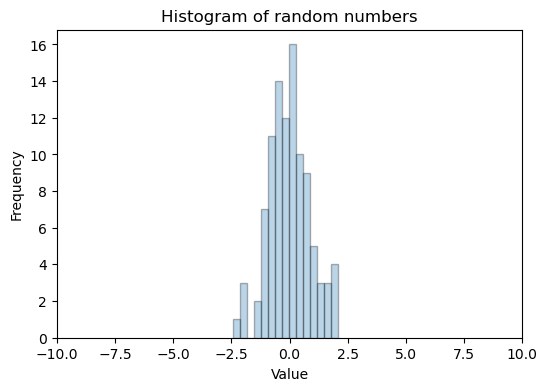

In [1]:
# Generating random numbers with a given mean and a standard deviation 

import numpy as np
import matplotlib.pyplot as plt

mean = 0.0
std = 1.0
n_steps = 100

rnd_numbers = np.random.normal(loc=mean, scale=std, size=n_steps)

#print(rnd_numbers)

plt.figure(figsize=(6,4))
plt.hist(rnd_numbers, bins=15, edgecolor='black', alpha=0.3)
plt.xlim(-10,10)
plt.title("Histogram of random numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")


(-30.0, 30.0)

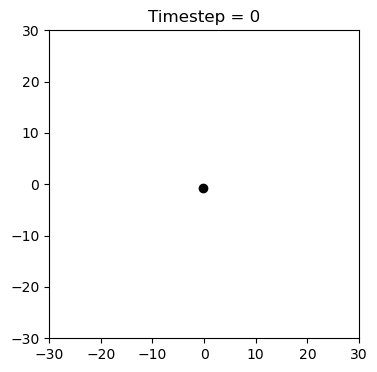

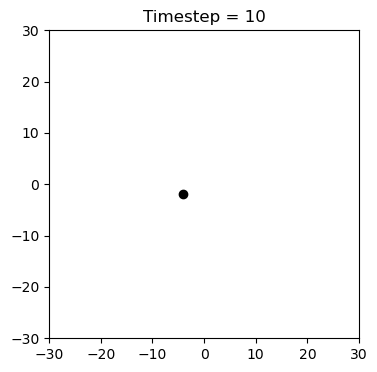

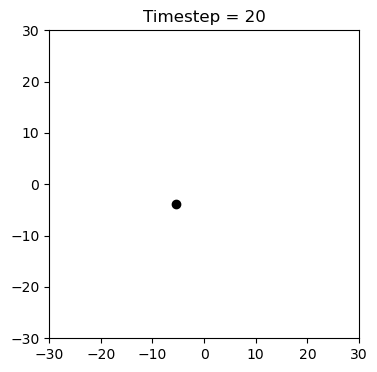

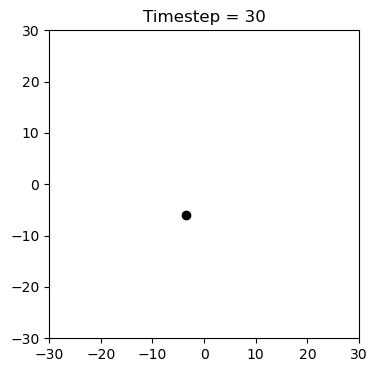

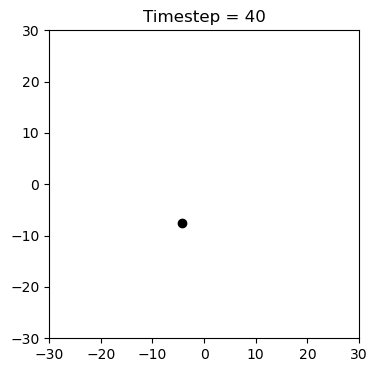

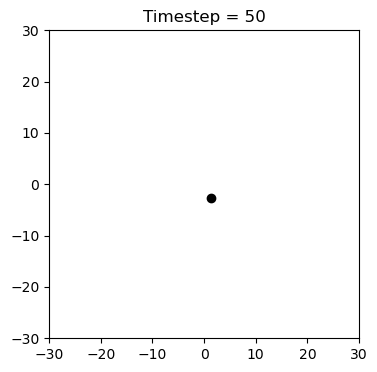

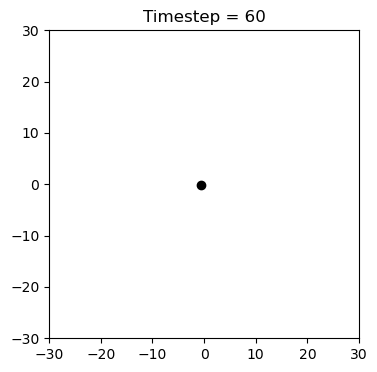

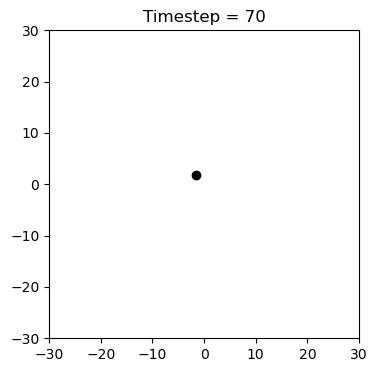

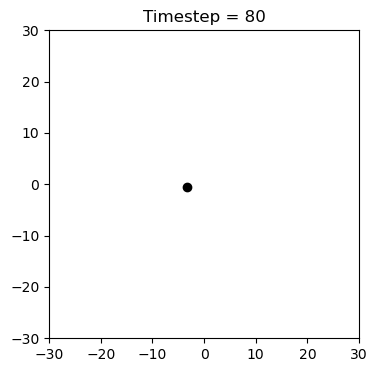

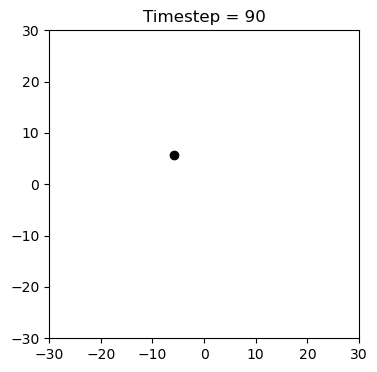

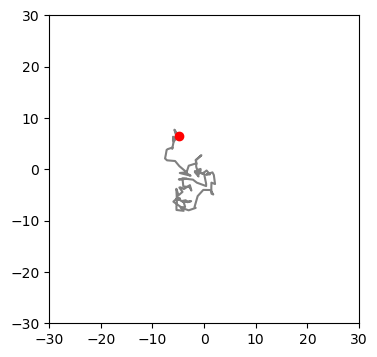

In [2]:

## Generating random motion of a particle

# Generating a random distance to move in 2D
dx = np.random.normal(loc=mean, scale=std, size=n_steps)
dy = np.random.normal(loc=mean, scale=std, size=n_steps)

positions = []
x, y = 0, 0 # initial position

for i in range(n_steps):
    # Random move
    x = x + dx[i] 
    y = y + dy[i]
    positions.append([x,y])
    
    # Snapshots
    if i%10 == 0:
        plt.figure(num=i, figsize=(4,4))
        plt.plot(x,y,'o',color='black')
        plt.title("Timestep = %d"%(i))
        plt.xlim(-30,30)
        plt.ylim(-30,30)    

positions = np.array(positions)

# Plotting trace
plt.figure(num=i+1, figsize=(4,4))
plt.plot(positions[:,0], positions[:,1],color='grey') # Trace of particle
plt.plot(positions[-1][0], positions[-1][1], 'o', color='red') # Last position
plt.xlim(-30,30)
plt.ylim(-30,30)


# Compute the mean squared displacement (MSD).

The mean squared displacement (MSD) measures how much particles move over time. The MSD plays an important role in characterizing Brownian motion, since it provides a measure of whether particles are moving according to diffusion alone or if there are other forces contributing. There are a number of definitions for the mean squared displacement. This function provides access to the most common definition.

$$
\mathrm{MSD}(m)
= \frac{1}{N_{\text{particles}}}
\sum_{i=1}^{N_{\text{particles}}}
\frac{1}{N-m}
\sum_{k=0}^{N-m-1}
\bigl(\vec{r}_i(k+m)-\vec{r}_i(k)\bigr)^2
$$

where $\vec{r}_i(t)$ is the position of particle $i$ in frame $t$. According to this definition, the mean squared displacement is the average displacement over all windows of length $m$ over the course of the simulation. Therefore, for any $m$, $\mathrm{MSD}(m)$ is averaged over all windows of length $m$ and over all particles. 


Text(0, 0.5, 'MSD')

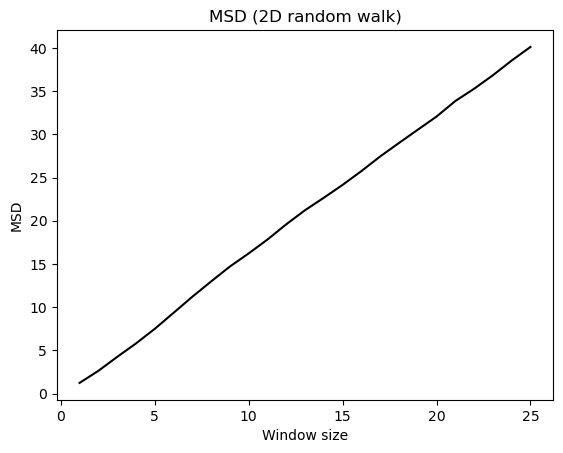

In [4]:

def compute_msd(positions):
    N = len(positions)
    max_window = N/4
    windows = np.arange(1, max_window + 1, dtype=int)
    msd = []
    for i, window in enumerate(windows):
        d = positions[window:] - positions[:-window] 
        msd.append(np.mean(np.sum(d*d, axis=1)))
    return windows, np.array(msd)

windows, msd = compute_msd(positions)

plt.plot(windows,msd,color='black')
plt.title("MSD (2D random walk)")
plt.xlabel("Window size")
plt.ylabel("MSD")
